## Exercise
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

In [1]:
import os

os.chdir('../../ThinkStats2/code')
import nsfg
import thinkstats2
import thinkplot

In [2]:
resp = nsfg.ReadFemResp()

> Use the NSFG respondent variable ```numkdhh``` to construct the actual distribution for the number of children under 18 in the respondents' households.

In [3]:
pmf = thinkstats2.Pmf(resp.numkdhh, label="actual")

> Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

In [4]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

In [5]:
biased_pmf = BiasPmf(pmf, "biased")

Plot the actual and biased distributions, and compute their means.

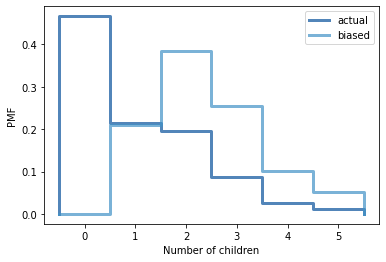

<Figure size 576x432 with 0 Axes>

In [6]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel="Number of children", ylabel="PMF")

In [7]:
print('PMF mean: ', pmf.Mean())

PMF mean:  1.024205155043831


In [8]:
print('Biased PMF mean: ', biased_pmf.Mean())

Biased PMF mean:  2.403679100664282


In [28]:
biased_pmf.Mean() / pmf.Mean()

2.3468726834922213

In [15]:
print("Probability of not having children:\n", f"Unbiased probability: {pmf.Prob(0)}", "\n", f"Biased probability: {biased_pmf.Prob(0)}")

Probability of not having children:
 Unbiased probability: 0.466178202276593 
 Biased probability: 0.0
